C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


                   username        review_date  \
0             Corinne Botha  November 30, 2024   
1              Kerry Badger   January 18, 2024   
2            Rosa Magalhaes   October 30, 2024   
3         MARLENE DAKESSIAN  December 08, 2024   
4  Emily Charlotte Reynolds   January 08, 2024   

                                         review_text  rating     Label  
0  that they dont give you a weeks free trial to ...       3   Neutral  
1  going well so far well supported a bit overwhe...       5   Neutral  
2                                 dont want to share       5   Neutral  
3                             too soon for me to say       4   Neutral  
4  i have been on zoe for 4 months now and will n...       3  Negative  
Index(['username', 'review_date', 'review_text', 'rating', 'Label'], dtype='object')
Logistic Regression Performance:
Accuracy: 0.9095
Precision: 0.9176
Recall: 0.9095
F1-Score: 0.9103

SVM Performance:
Accuracy: 0.9014
Precision: 0.9164
Recall: 0.9014
F1-Score

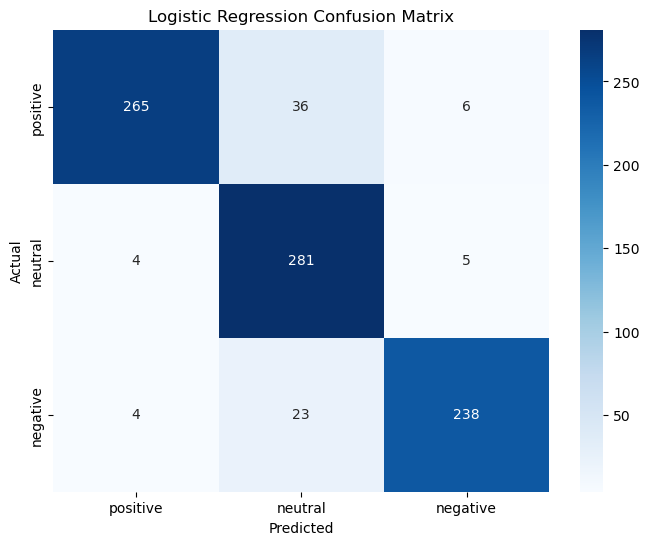

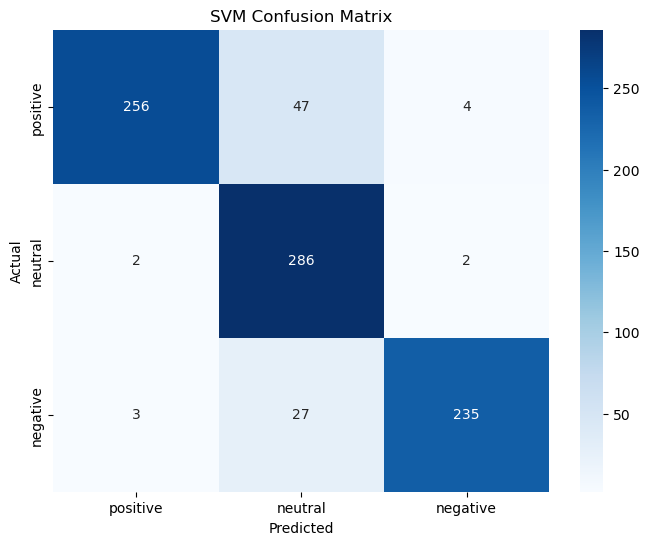

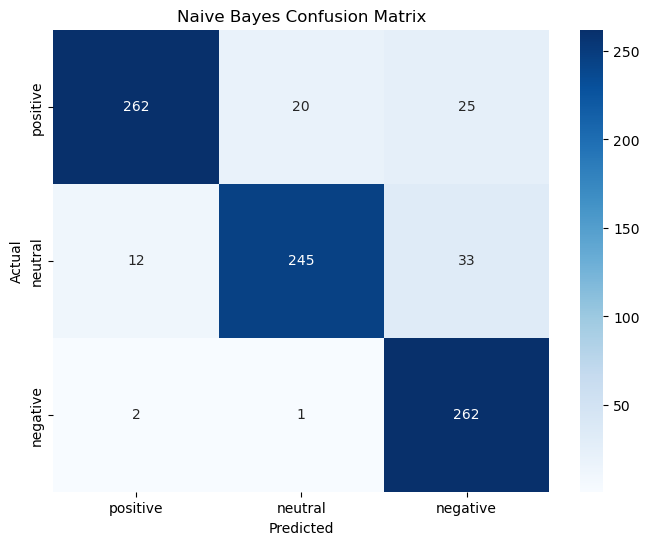

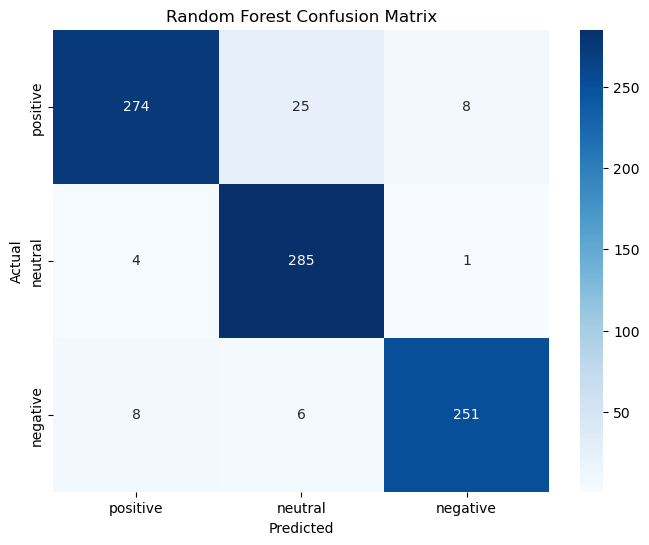

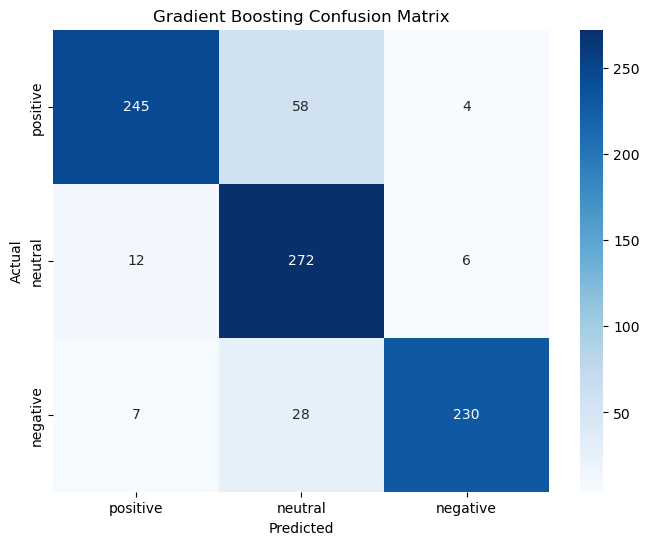

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import re

# nltk veri dosyaları
def download_nltk_resources():
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

# Veri yükleme
try:
    data = pd.read_csv('updated_sample_reviews.csv', encoding='utf-8', sep=';')
except UnicodeDecodeError:
    data = pd.read_csv('updated_sample_reviews.csv', encoding='latin1', sep=';')
except Exception as e:
    print(f"Dosya yüklenirken bir hata oluştu: {e}")
    exit()

print(data.head())
print(data.columns)

# Metin sütunu ve etiket sütunları
text_column = 'review_text'
label_column = 'Label'

# Label sütununu küçük harfe çevir ve boşlukları kaldır
data[label_column] = data[label_column].str.lower().str.strip()

# Eksik değerleri kontrol et ve kaldır
data = data.dropna(subset=[text_column, label_column])

# Küçük harfe çevirme ve özel karakterleri kaldırma
def standardize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# NLP ön işleme: Tokenizasyon, stop-word kaldırma, lemmatizasyon
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Metinleri temizle ve ön işleme uygula
data['cleaned_text'] = data[text_column].apply(standardize_text).apply(preprocess_text)

# Veri bölme: Eğitim ve test seti
X = data['cleaned_text']
y = data[label_column]

# TF-IDF vektörizasyonu
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(X)

# SMOTE uygulanması
smote = SMOTE(random_state=42)
X_tfidf_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_smote, y_smote, test_size=0.2, random_state=42)

# Lojistik Regresyon modeli eğitimi ve değerlendirmesi
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

# SVM modeli eğitimi ve değerlendirmesi
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

# Naive Bayes modeli eğitimi ve değerlendirmesi
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")

# Random Forest modeli eğitimi ve değerlendirmesi
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

# Gradient Boosting modeli eğitimi ve değerlendirmesi
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")

# Confusion Matrix çizimi için bir fonksiyon
def plot_confusion_matrix_fixed(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Beklenen sınıflar
expected_classes = ['positive', 'neutral', 'negative']

# Logistic Regression Confusion Matrix
plot_confusion_matrix_fixed(y_test, y_pred_lr, classes=expected_classes, title="Logistic Regression Confusion Matrix")
# SVM Confusion Matrix
plot_confusion_matrix_fixed(y_test, y_pred_svm, classes=expected_classes, title="SVM Confusion Matrix")
# Naive Bayes Confusion Matrix
plot_confusion_matrix_fixed(y_test, y_pred_nb, classes=expected_classes, title="Naive Bayes Confusion Matrix")
# Random Forest Confusion Matrix
plot_confusion_matrix_fixed(y_test, y_pred_rf, classes=expected_classes, title="Random Forest Confusion Matrix")
# Gradient Boosting Confusion Matrix
plot_confusion_matrix_fixed(y_test, y_pred_gb, classes=expected_classes, title="Gradient Boosting Confusion Matrix")
